## SQL Data Project 
GitHub: @guzmanwolfrank 

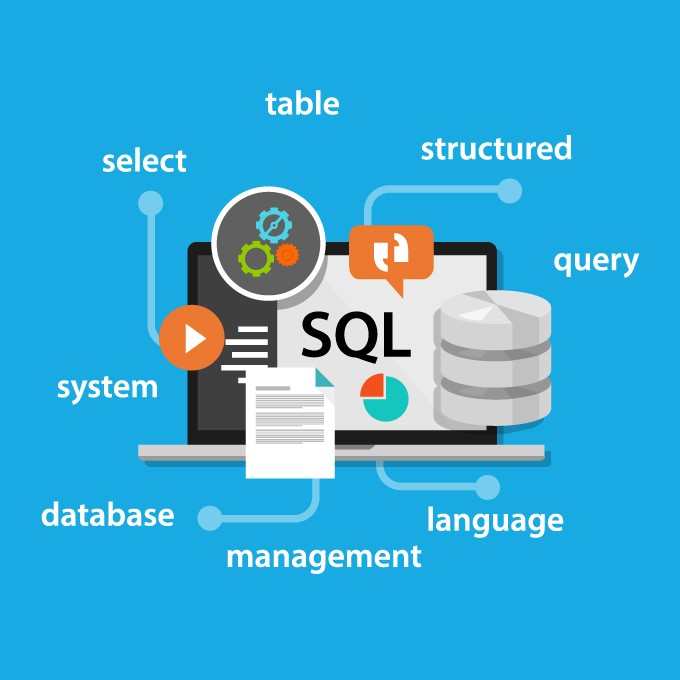

In this project we will run SQL queries on a database to resolve questions about a backtest and its results. 

In the csv file, SDF, we are looking at trades generated by a moving average cross signal backtest.  The algorithm's trades are listed on this sheet along with some details and data about a buy and hold strategy as a benchmark.  

We will run SQL queries on the data in order to find answers about the results of the algorithmic backtest. We can also visualize the data in order to understand the results of the backtest better.  



First we must take a csv file, sdf.csv and import it as a dataframe in order to run SQL and SQLite3 Queries on the data.   

In [1]:
import pandas as pd
import sqlite3
import seaborn as sns
import matplotlib.pyplot as plt
import warnings 

# Ignore all warnings
warnings.filterwarnings('ignore')

# Step 1: Read the CSV File
csv_file = r'C:\Users\Wolfrank\Desktop\sdf.csv'  # Use a raw string for the file path
df = pd.read_csv(csv_file)

# Step 2: Create a SQLite Database
conn = sqlite3.connect('trades.db')  

# Step 3: Write the DataFrame to the Database
table_name = 'trades_table' 
df.to_sql(table_name, conn, if_exists='replace', index=False)


49

Now we can retrieve all the data and began using SQL queries.

In [2]:

# SQL queries

#Retrieve all rows from the trades_table
SQL = f"SELECT * FROM {table_name}"
df_all_trades = pd.read_sql_query(SQL, conn)


The first questions we have relate to performance.  

    1. What was the average profit per trade?

In [3]:

# 1. Calculate the average profit per trade. 
SQL = f"SELECT AVG(Strat_Profits) AS average_profits FROM {table_name}"
average_profits = pd.read_sql_query(SQL, conn)['average_profits'].iloc[0].round(2)

# Display
print("The average  of profits is:", average_profits)

The average  of profits is: 953.47


    2.  Now, let's use a SQL Query to see what the profitable trades look like. 
        How many were there? What were their profit amounts in relation to count? 

In [4]:

# 2. Find trades with a profit (Change > 0)
SQL = f"SELECT * FROM {table_name} WHERE Change > 0"
df_profitable_trades = pd.read_sql_query(SQL, conn)

display('The trades with a profit are ', df_profitable_trades)

'The trades with a profit are '

,Tradeno,Date,Shares,Symbol,Open,High,Low,Close,Volume,Range,...,Strat_Profits,WinLoss,Win,Loss,Strat_Drawdown,bhDrawdown,bhreturn,bhreturnpct,strategy_return,stratreturnpct
0,4,2020-07-09,1000,TQQQ,28.85,29.17,27.47,28.92,158798000,1.70,...,70.0,Win,70.0,0.0,46650.0,55970.0,0.071111,7.111111,0.002609,0.260902
1,11,2020-07-20,1000,TQQQ,28.20,30.56,27.77,30.34,125810800,2.79,...,2140.0,Win,2140.0,0.0,44790.0,54550.0,0.123704,12.370370,0.071934,7.193440
2,20,2020-07-31,1000,TQQQ,29.83,29.88,28.22,29.84,179907600,1.66,...,10.0,Win,10.0,0.0,44780.0,55050.0,0.105185,10.518519,0.072307,7.230712
3,60,2020-09-28,1000,TQQQ,32.32,32.50,31.39,32.43,136665600,1.11,...,110.0,Win,110.0,0.0,44710.0,52460.0,0.201111,20.111111,0.074916,7.491614
4,87,2020-11-04,1000,TQQQ,33.90,35.66,33.33,35.02,169187600,2.33,...,1120.0,Win,1120.0,0.0,43590.0,49870.0,0.297037,29.703704,0.116660,11.666045
5,115,2020-12-15,1000,TQQQ,42.15,42.50,41.23,42.47,78708800,1.27,...,320.0,Win,320.0,0.0,43270.0,42420.0,0.572963,57.296296,0.128587,12.858740
6,131,2021-01-08,1000,TQQQ,46.83,47.72,45.85,47.57,76407600,1.87,...,740.0,Win,740.0,0.0,42530.0,37320.0,0.761852,76.185185,0.156168,15.616847
7,138,2021-01-20,1000,TQQQ,47.93,49.94,47.76,49.49,60868000,2.18,...,1560.0,Win,1560.0,0.0,40970.0,35400.0,0.832963,83.296296,0.214312,21.431234
8,147,2021-02-02,1000,TQQQ,49.94,51.48,49.88,50.91,46373200,1.60,...,970.0,Win,970.0,0.0,40000.0,33980.0,0.885556,88.555556,0.250466,25.046590
9,173,2021-03-11,1000,TQQQ,44.51,46.13,44.07,45.39,79467800,2.06,...,880.0,Win,880.0,0.0,39120.0,39500.0,0.681111,68.111111,0.283265,28.326500


    We can see that there were 41 profitable trades. 

Here is a Seaborn visualization of the profitable trades in relation to their count.  

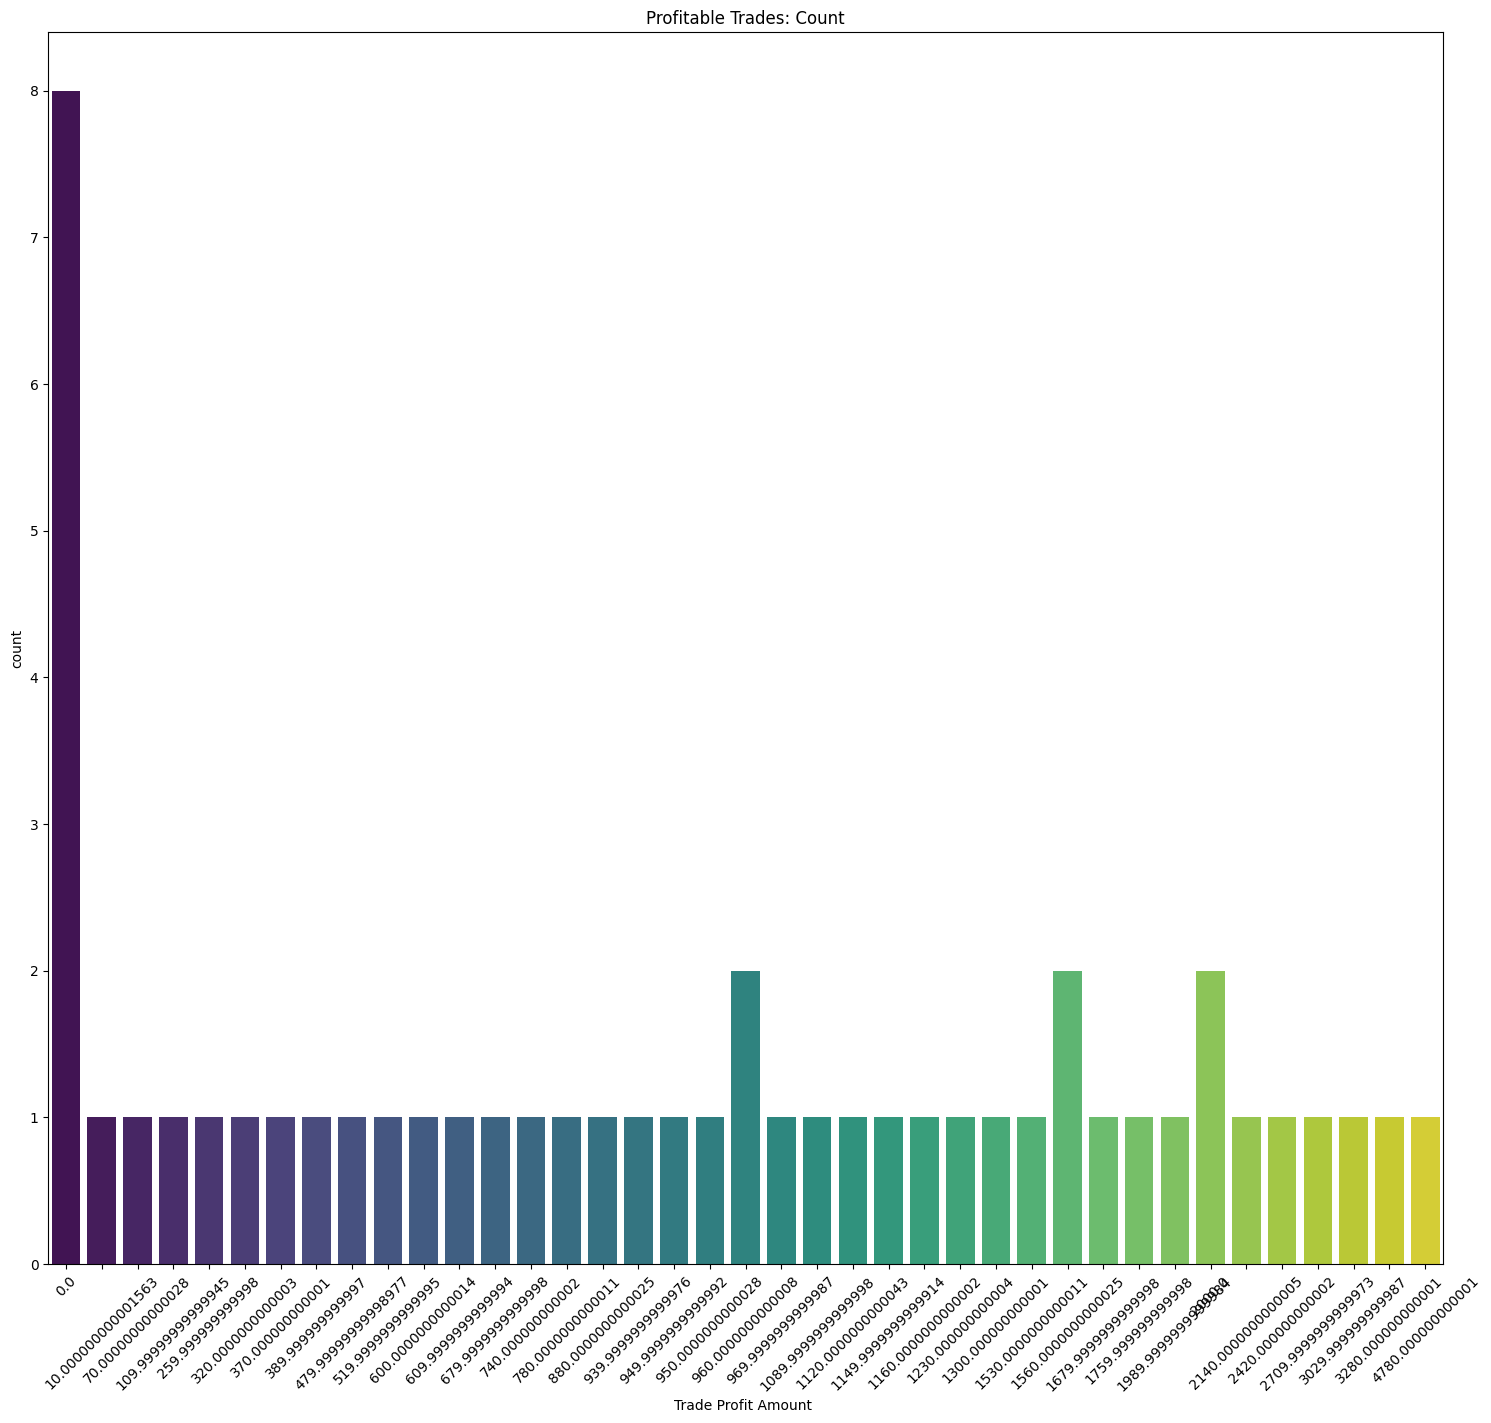

In [5]:
# 2. Profitable vs. Loss Trades (Count)
plt.figure(figsize=(18, 16))
sns.countplot(x='Win', data=df_all_trades, palette='viridis')
plt.xlabel('Trade Profit Amount ')
plt.title('Profitable Trades: Count')
plt.xticks(rotation=45)
plt.show()

    3.  What were the total profits for the moving average cross backtest strategy?

In [6]:

# 3. Calculate the total volume for each symbol
SQL = f"SELECT Symbol, SUM(Strat_Profits) AS totalprofits FROM {table_name} GROUP BY Symbol"
totalprofits = pd.read_sql_query(SQL, conn)
display(totalprofits)

,Symbol,totalprofits
0,TQQQ,46720.0


    The total profits were $46,720

    4. What were the losing trades in the strategy?  What did they look like? 

In [7]:

# 4. Find trades with a loss (Change < 0)
SQL = f"SELECT * FROM {table_name} WHERE Change < 0"
df_loss_trades = pd.read_sql_query(SQL, conn)
display(df_loss_trades)

,Tradeno,Date,Shares,Symbol,Open,High,Low,Close,Volume,Range,...,Strat_Profits,WinLoss,Win,Loss,Strat_Drawdown,bhDrawdown,bhreturn,bhreturnpct,strategy_return,stratreturnpct
0,8,2020-07-15,1000,TQQQ,28.72,29.06,27.35,28.44,183772000,1.71,...,-280.0,Loss,0.0,-280.0,46930.0,56450.0,0.053333,5.333333,-0.007827,-0.782706
1,29,2020-08-13,1000,TQQQ,32.02,32.79,31.63,31.98,117140800,1.16,...,-40.0,Loss,0.0,-40.0,44820.0,52910.0,0.184444,18.444444,0.070816,7.081625
2,181,2021-03-23,1000,TQQQ,46.03,46.62,44.58,44.95,93890400,2.04,...,-1080.0,Loss,0.0,-1080.0,40200.0,39940.0,0.664815,66.481481,0.243012,24.301155
3,320,2021-10-08,1000,TQQQ,65.33,65.46,63.49,63.74,78566000,1.97,...,-1590.0,Loss,0.0,-1590.0,29560.0,21150.0,1.360741,136.074074,0.639583,63.958256
4,346,2021-11-15,1000,TQQQ,83.46,83.65,81.04,82.70,69729200,2.61,...,-760.0,Loss,0.0,-760.0,28760.0,2190.0,2.062963,206.296296,0.669400,66.939993
5,578,2022-10-18,1000,TQQQ,20.87,21.00,19.17,19.78,346276900,1.83,...,-1090.0,Loss,0.0,-1090.0,8940.0,65110.0,-0.267407,-26.740741,1.408125,140.812523
6,618,2022-12-14,1000,TQQQ,22.21,22.99,21.08,21.80,289455500,1.91,...,-410.0,Loss,0.0,-410.0,5340.0,63090.0,-0.192593,-19.259259,1.542303,154.230339
7,634,2023-01-09,1000,TQQQ,18.08,18.96,17.89,18.01,186021400,1.07,...,-70.0,Loss,0.0,-70.0,5410.0,66880.0,-0.332963,-33.296296,1.539694,153.969437


    There were 8 losing trades in the strategy from 2020 - 2023. 

Here is a Seaborn barchart of the losing trades with their amounts and count. 

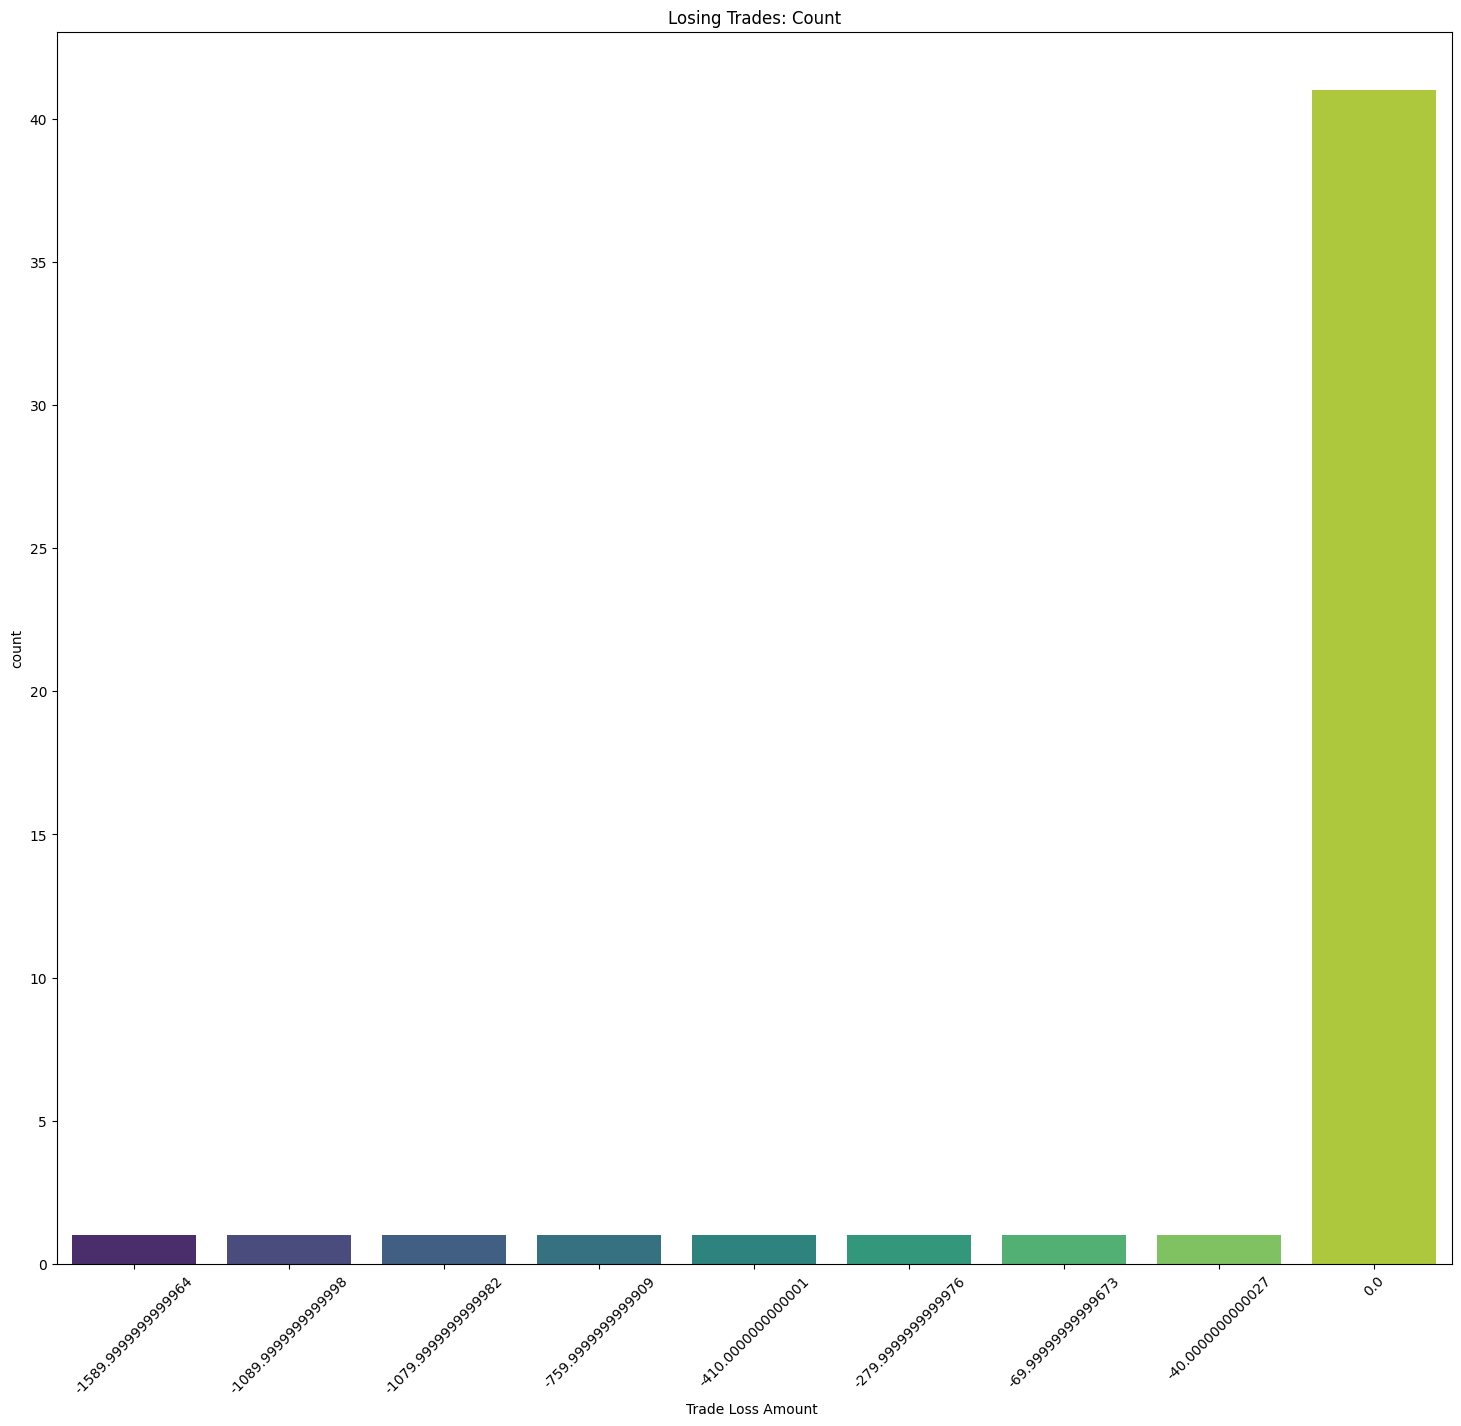

In [8]:


# 2a. Profitable vs. Loss Trades (Count)
plt.figure(figsize=(18, 16))
sns.countplot(x='Loss', data=df_all_trades, palette='viridis')
plt.xlabel('Trade Loss Amount ')
plt.title('Losing Trades: Count')
plt.xticks(rotation=45)
plt.show()

    5. What was the most money made on any particular trade? 

In [9]:
# Query:  Find the maximum value in the 'strat_profits' column 
SQL = "SELECT MAX(strat_profits) From trades_table"


# Execute the query and fetch the result 
max_profits = conn.execute(SQL).fetchone()[0]

#Print the result
print('The most money made on any one trade was:  $',max_profits)

The most money made on any one trade was:  $ 4780.000000000001


    When did the most profitable trade occur? 

In [10]:
# Find the row with the maximum Strat_Profits value
max_profit_row = df[df['Strat_Profits'] == df['Strat_Profits'].max()]

# Extract the date from the row
date_of_max_profit = max_profit_row['Date'].values[0]

print("max profit trade occured on:", date_of_max_profit)

max profit trade occured on: 2022-01-31


    The most profitable trade occured on Jan 31, 2022.  

    6. What was the highest price that TQQQ hit during this backtest? 

In [11]:
# 6. Find the maximum value in the 'close' column
SQL = "SELECT MAX(close) FROM trades_table"

# Execute the query and fetch the result
max_close = conn.execute(SQL).fetchone()[0]

# Close the database connection
#conn.close()

# Print the result
print(f"The maximum value in the 'close' column is: {max_close}")

The maximum value in the 'close' column is: 84.89


    The highest price that TQQQ hit during this backtest was 84.89. 

    7. How does the strategy's return percentage compare to the benchmark?

In [12]:

# 7. How does the strategy's return percentage compare to the benchmark?
SQL = "SELECT Strat_Balance, bhBalance FROM trades_table ORDER BY Date DESC LIMIT 1"
result = conn.execute(SQL).fetchone()
strategy_return, benchmark_return = result
comparison = strategy_return - benchmark_return
print(f" The strategy's return is $ {comparison:.2f} {'higher' if comparison > 0 else 'lower'} than the benchmark.\n")


 The strategy's return is $ 32550.00 higher than the benchmark.



In [13]:
print ('The benchmark return amount was: $ ', benchmark_return)
print('While the backtest strategy return amount was: $', strategy_return)

The benchmark return amount was: $  41000.0
While the backtest strategy return amount was: $ 73550.0


For more insight, here is a Seaborn chart comparing the Backtest Strategy to the Buy and Hold benchmark. 

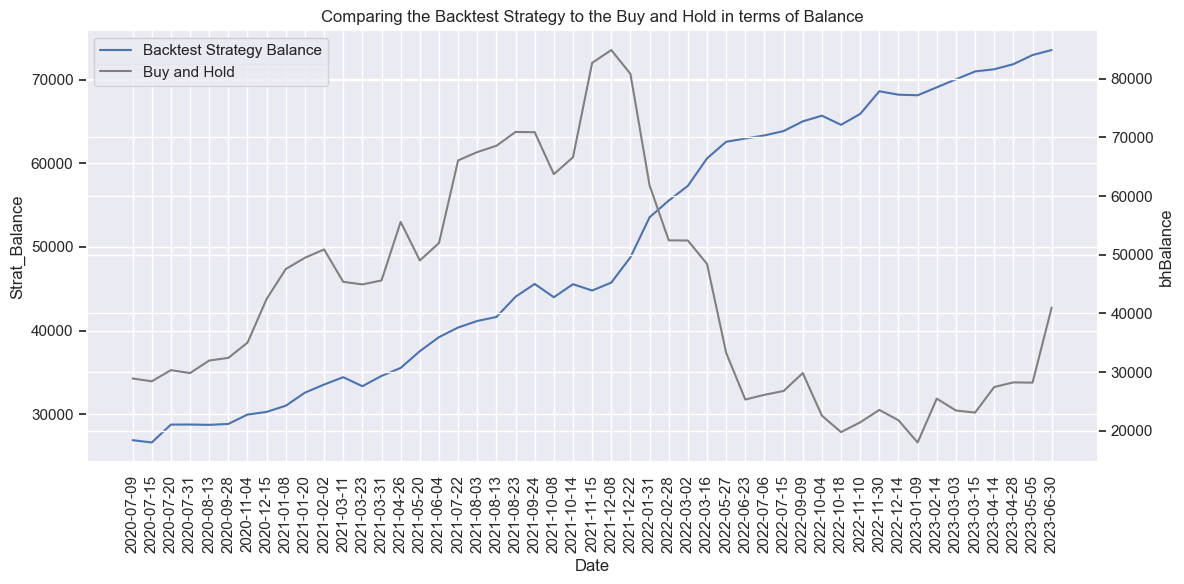

In [14]:
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming 'df' is your DataFrame containing the data

sns.set(style="darkgrid")
plt.figure(figsize=(12, 6))  # Adjust the figure size as needed

# Plot the first y-axis
ax1 = sns.lineplot(data=df, x='Date', y='Strat_Balance', label='Backtest Strategy Balance')
plt.xticks(rotation=90)
ax1.set_xlabel('Date')
ax1.set_ylabel('Strat_Balance')

# Create a secondary y-axis for 'bhBalance'
ax2 = ax1.twinx()
sns.lineplot(data=df, x='Date', y='bhBalance', color='grey', ax=ax2, label='Buy and Hold')
ax2.set_ylabel('bhBalance')

# Combine legends from both axes
lines1, labels1 = ax1.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
lines = lines1 + lines2
labels = labels1 + labels2
plt.legend(lines, labels, loc="upper left")

plt.title('Comparing the Backtest Strategy to the Buy and Hold in terms of Balance')
plt.tight_layout()
plt.show()


# Note that the Buy and Hold Strategy starts with a small lead due to it's trading since day 1, 
# the Backtest Strategy didn't get an initial signal until 4 trading days later.  
# Also, note that the starting balance used was based on the Buy and Hold Benchmark's first trade day. 

Here is a boxplot of the daily returns on the backtest strategy. 

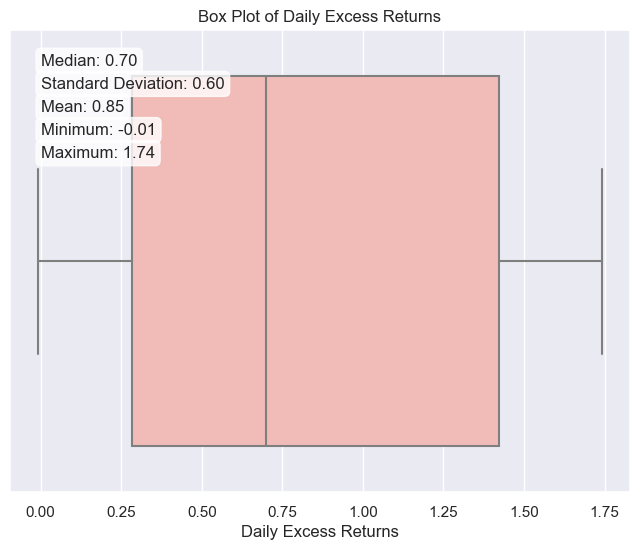

In [15]:
import matplotlib.pyplot as plt
import seaborn as sns

# Create the box plot
plt.figure(figsize=(8, 6))
ax = sns.boxplot(x='strategy_return', data=df_all_trades, orient='vertical', palette='Pastel1')

# Calculate statistics
median_value = df_all_trades['strategy_return'].median()
std_deviation = df_all_trades['strategy_return'].std()
mean_value = df_all_trades['strategy_return'].mean()
min_value = df_all_trades['strategy_return'].min()
max_value = df_all_trades['strategy_return'].max()

# Add labels for median, standard deviation, mean, min, and max
labels = [
    f'Median: {median_value:.2f}',
    f'Standard Deviation: {std_deviation:.2f}',
    f'Mean: {mean_value:.2f}',
    f'Minimum: {min_value:.2f}',
    f'Maximum: {max_value:.2f}'
]

for i, label in enumerate(labels):
    ax.text(0.05, 0.95 - i * 0.05, label, transform=ax.transAxes, fontsize=12,
            verticalalignment='top', bbox=dict(boxstyle='round', facecolor='white', alpha=0.8))

# Set labels and title
plt.xlabel('Daily Excess Returns')
plt.title('Box Plot of Daily Excess Returns')

# Show the plot
plt.show()

conn.close()


In conclusion, after querying results, we see that the algorithmic backtest strategy was more profitable than the benchmark of buy and hold on TQQQ stock.  

The standard deviation made it predictable and risk averse, while the signals generated trades that were highly profitable and had limited drawdown and losing trades and days. 

The strategy return ended up being $32,000 higher than the benchmark of buy and hold on TQQQ. 

A simple buy strategy on a moving average cross was able to beat the volatility and drawdown that TQQQ sustained on a buy and hold approach.  

By using SQL queries we were also able to identify certain trades along with analyzing data.  

